# Introduction to Spark

## Basic initialization

`SparkSession` is used to connect to the Spark Cluster.

In [1]:
from pyspark.sql import SparkSession

We will use Pandas to operate on the reduced data in the *driver program*.

In [2]:
import pandas as pd

Numpy will be always useful.

In [3]:
import numpy as np

Create a new session (or reuse an existing one).

In [4]:
spark = SparkSession.builder.getOrCreate()

24/10/22 08:25:14 WARN Utils: Your hostname, MacBook-Pro-BartomiejK.local resolves to a loopback address: 127.0.0.1; using 10.129.1.50 instead (on interface en0)
24/10/22 08:25:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/22 08:25:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
spark

We can see that the session is established.

## Creating Spark Data Frames from Pandas

We can list the tables in our Spark Session, currently empty.

In [6]:
print(spark.catalog.listTables())

[]


We can create a Pandas `DataFrame` with random values.

In [7]:
pd_temp = pd.DataFrame(np.random.random(100))

We can see on the plot that it is really random:

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

<Axes: >

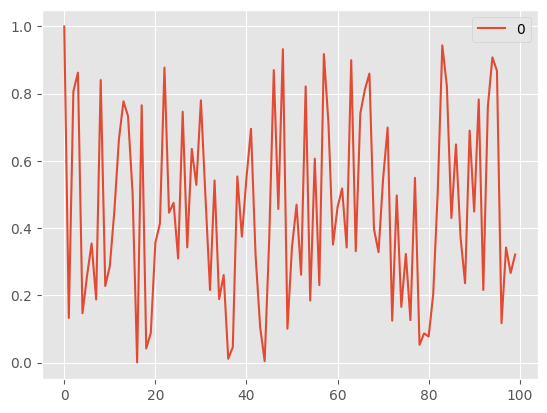

In [9]:
pd_temp.plot()

Now we can convert it into Spark DataFrame:

In [10]:
spark_temp = spark.createDataFrame(pd_temp)

`createOrReplaceTempView` creates (or replaces if that view name already exists) a lazily evaluated "view" that you can then use like a table in Spark SQL. 

It does not persist to memory unless you cache (persist) the dataset that underpins the view.

In [11]:
spark_temp.createOrReplaceTempView("temp")

The created view is `TEMPORARY` which means it is not persistent.

In [12]:
print(spark.catalog.listTables())

[Table(name='temp', catalog=None, namespace=[], description=None, tableType='TEMPORARY', isTemporary=True)]


In [13]:
spark_temp.show()

+--------------------+
|                   0|
+--------------------+
|  0.9997221823183157|
| 0.13296475097127858|
|  0.8066469855913011|
|  0.8624020080492301|
|  0.1468940463898335|
| 0.25816064382677206|
| 0.35404887137429175|
| 0.18768312292199552|
|  0.8403643584366873|
| 0.22796165858322404|
| 0.28690163021632165|
| 0.45115719099548945|
|  0.6640818647190321|
|  0.7771160871377559|
|  0.7325817250624118|
|  0.5042809160871842|
|4.069511992826902E-4|
|  0.7654092006561953|
| 0.04204341683159751|
| 0.08824416291649939|
+--------------------+
only showing top 20 rows



We can now use transformations on this DataFrame. The transformations are translated (compiled) to RDD transformations.

In [14]:
from pyspark.sql.functions import col, asc

In [15]:
spark_temp.filter((col('0') > 0.9)).show()

+------------------+
|                 0|
+------------------+
|0.9997221823183157|
| 0.932077247053695|
|0.9177348718602025|
|0.9435652984170578|
|0.9079060286580405|
+------------------+



## Creating Spark Data Frames from input files

In [16]:
file_path = "airports.csv"

# Read in the airports data
airports = spark.read.csv(file_path,header=True)

# Show the data
print(airports.show())

+---+--------------------+------------------+----------------+---+----+------------------+-------------------+----+---+---+--------------------+-------+-----------+
|  1|      Goroka Airport|            Goroka|Papua New Guinea|GKA|AYGA|-6.081689834590001|      145.391998291|5282| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
+---+--------------------+------------------+----------------+---+----+------------------+-------------------+----+---+---+--------------------+-------+-----------+
|  2|      Madang Airport|            Madang|Papua New Guinea|MAG|AYMD|    -5.20707988739|      145.789001465|  20| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  3|Mount Hagen Kagam...|       Mount Hagen|Papua New Guinea|HGU|AYMH|-5.826789855957031| 144.29600524902344|5388| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  4|      Nadzab Airport|            Nadzab|Papua New Guinea|LAE|AYNZ|         -6.569803|         146.725977| 239| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  5|Port 

It may be useful to convert them to Pandas for quick browsing. 

**Warning!** This is not efficient for large datasets, as it requires performing actions on the dataset.

In [17]:
airports.toPandas()

,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081689834590001,145.391998291,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20707988739,145.789001465,20,10,U,Pacific/Port_Moresby,airport,OurAirports
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826789855957031,144.29600524902344,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380355834961,147.22000122070312,146,10,U,Pacific/Port_Moresby,airport,OurAirports
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.58383011818,143.669006348,19,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7178,12053,Rugao Air Base,Rugao,China,RUG,ZSRG,32.25788497924805,120.50165557861328,0,\N,\N,\N,airport,OurAirports
7179,12054,Wuhu Air Base,Wuhu,China,WHU,ZSWU,31.3906,118.408997,0,\N,\N,\N,airport,OurAirports
7180,12055,Shanshan Airport,Shanshan,China,SXJ,ZWSS,42.91170120239258,90.24749755859375,0,\N,\N,\N,airport,OurAirports
7181,12056,Yingkou Lanqi Airport,Yingkou,China,YKH,ZYYK,40.542524,122.3586,0,\N,\N,\N,airport,OurAirports


### Running SQL queries on dataframes

In [18]:
airports.createOrReplaceTempView("airports")

In [19]:
# Get the first 10 rows of flights
query = "FROM airports SELECT * LIMIT 10"

airports10 = spark.sql(query)

# Show the results
airports10.show()

+---+--------------------+------------+----------------+---+----+------------------+------------------+----+---+---+--------------------+-------+-----------+
|  1|      Goroka Airport|      Goroka|Papua New Guinea|GKA|AYGA|-6.081689834590001|     145.391998291|5282| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
+---+--------------------+------------+----------------+---+----+------------------+------------------+----+---+---+--------------------+-------+-----------+
|  2|      Madang Airport|      Madang|Papua New Guinea|MAG|AYMD|    -5.20707988739|     145.789001465|  20| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  3|Mount Hagen Kagam...| Mount Hagen|Papua New Guinea|HGU|AYMH|-5.826789855957031|144.29600524902344|5388| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  4|      Nadzab Airport|      Nadzab|Papua New Guinea|LAE|AYNZ|         -6.569803|        146.725977| 239| 10|  U|Pacific/Port_Moresby|airport|OurAirports|
|  5|Port Moresby Jack...|Port Moresby|Papua New Gui

### More complex examples 

Read data from CSV file:
 * `inferSchema` - to detect which columns are numbers (not strigs!) - useful e.g. for sorting.
 * `header` - to read the firs line as column names

In [20]:
countries = spark.read.csv("countries of the world.csv",inferSchema=True,header=True)

In [21]:
countries.toPandas()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,None,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",None,None,NaN,None,None,"0,02",0,"99,98",1,None,None,None,None,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


We can inspect the schema of the DataFrame.

In [22]:
countries.printSchema()

root
 |-- Country: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- Population: integer (nullable = true)
 |-- Area (sq. mi.): integer (nullable = true)
 |-- Pop. Density (per sq. mi.): string (nullable = true)
 |-- Coastline (coast/area ratio): string (nullable = true)
 |-- Net migration: string (nullable = true)
 |-- Infant mortality (per 1000 births): string (nullable = true)
 |-- GDP ($ per capita): integer (nullable = true)
 |-- Literacy (%): string (nullable = true)
 |-- Phones (per 1000): string (nullable = true)
 |-- Arable (%): string (nullable = true)
 |-- Crops (%): string (nullable = true)
 |-- Other (%): string (nullable = true)
 |-- Climate: string (nullable = true)
 |-- Birthrate: string (nullable = true)
 |-- Deathrate: string (nullable = true)
 |-- Agriculture: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Service: string (nullable = true)



### Examples of SQL Queries

In [23]:
countries.createOrReplaceTempView("countries")

In [24]:
spark.sql("SELECT * FROM countries WHERE Region LIKE '%OCEANIA%'").toPandas()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000,"97,0","259,5",10,15,75,2,"22,46","3,27",None,None,None
1,Australia,OCEANIA,20264082,7686850,"2,6","0,34","3,98","4,69",29000,"100,0","565,5","6,55","0,04","93,41",1,"12,14","7,51","0,038","0,262","0,7"
2,Cook Islands,OCEANIA,21388,240,"89,1","50,00",None,None,5000,"95,0","289,9","17,39","13,04","69,57",2,21,None,"0,151","0,096","0,753"
3,Fiji,OCEANIA,905949,18270,"49,6","6,18","-3,14","12,62",5800,"93,7","112,6","10,95","4,65","84,4",2,"22,55","5,65","0,089","0,135","0,776"
4,French Polynesia,OCEANIA,274578,4167,"65,9","60,60","2,94","8,44",17500,"98,0","194,5","0,82","5,46","93,72",2,"16,68","4,69","0,031","0,19","0,769"
5,Guam,OCEANIA,171019,541,"316,1","23,20",0,"6,94",21000,"99,0","492,0","9,09","16,36","74,55",2,"18,79","4,48",None,None,None
6,Kiribati,OCEANIA,105432,811,"130,0","140,94",0,"48,52",800,None,"42,7","2,74","50,68","46,58",2,"30,65","8,26","0,089","0,242","0,668"
7,Marshall Islands,OCEANIA,60422,11854,"5,1","3,12","-6,04","29,45",1600,"93,7","91,2","16,67","38,89","44,44",2,"33,05","4,78","0,317","0,149","0,534"
8,"Micronesia, Fed. St.",OCEANIA,108004,702,"153,9","870,66","-20,99","30,21",2000,"89,0","114,8","5,71","45,71","48,58",2,"24,68","4,75","0,289","0,152","0,559"
9,Nauru,OCEANIA,13287,21,"632,7","142,86",0,"9,95",5000,None,"143,0",0,0,100,2,"24,76","6,7",None,None,None


### Queries using PySpark DSL

DSL = Domain Specific Language - API similar to natural or other language, implemented as library in another language.

List all the countries with the population > 38 million

In [25]:
countries.filter((col("Population") > 38000000)).orderBy("Population").toPandas()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Poland,EASTERN EUROPE,38536869,312685,"123,3","0,16","-0,49","8,51",11100,"99,8","306,3","45,91","1,12","52,97",3,"9,85","9,89","0,05","0,311","0,64"
1,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
2,Spain,WESTERN EUROPE,40397842,504782,"80,0","0,98","0,99","4,42",22000,"97,9","453,5","26,07","9,87","64,06",3,"10,06","9,72","0,04","0,295","0,665"
3,Sudan,SUB-SAHARAN AFRICA,41236378,2505810,"16,5","0,03","-0,02","62,5",1900,"61,1","16,3","6,83","0,18","92,99",2,"34,53","8,97","0,387","0,203","0,41"
4,Colombia,LATIN AMER. & CARIB,43593035,1138910,"38,3","0,28","-0,31","20,97",6300,"92,5","176,2","2,42","1,67","95,91",2,"20,48","5,58","0,125","0,342","0,533"
5,South Africa,SUB-SAHARAN AFRICA,44187637,1219912,"36,2","0,23","-0,29","61,81",10700,"86,4","107,0","12,08","0,79","87,13",1,"18,2",22,"0,025","0,303","0,671"
6,Ukraine,C.W. OF IND. STATES,46710816,603700,"77,4","0,46","-0,39","20,34",5400,"99,7","259,9","56,21","1,61","42,18",3,"8,82","14,39","0,187","0,452","0,361"
7,Burma,ASIA (EX. NEAR EAST),47382633,678500,"69,8","0,28","-1,8","67,24",1800,"85,3","10,1","15,19","0,97","83,84",2,"17,91","9,83","0,564","0,082","0,353"
8,"Korea, South",ASIA (EX. NEAR EAST),48846823,98480,"496,0","2,45",0,"7,05",17800,"97,9","486,1","17,18","1,95","80,87",3,10,"5,85","0,033","0,403","0,563"
9,Italy,WESTERN EUROPE,58133509,301230,"193,0","2,52","2,07","5,94",26700,"98,6","430,9","27,79","9,53","62,68",None,"8,72","10,4","0,021","0,291","0,688"


Select all the countries from Europe

In [26]:
countries.select("Country", "Population").where(col("Region").like("%EUROPE%")).show()

+--------------------+----------+
|             Country|Population|
+--------------------+----------+
|            Albania |   3581655|
|            Andorra |     71201|
|            Austria |   8192880|
|            Belgium |  10379067|
|Bosnia & Herzegov...|   4498976|
|           Bulgaria |   7385367|
|            Croatia |   4494749|
|     Czech Republic |  10235455|
|            Denmark |   5450661|
|      Faroe Islands |     47246|
|            Finland |   5231372|
|             France |  60876136|
|            Germany |  82422299|
|          Gibraltar |     27928|
|             Greece |  10688058|
|           Guernsey |     65409|
|            Hungary |   9981334|
|            Iceland |    299388|
|            Ireland |   4062235|
|        Isle of Man |     75441|
+--------------------+----------+
only showing top 20 rows



Conditions in `where` clause can contain logical expressions.

In [27]:
countries.select("Country", "Population")\
.where((col("Region").like("%EUROPE%")) & (col("Population")> 10000000)).show()

+---------------+----------+
|        Country|Population|
+---------------+----------+
|       Belgium |  10379067|
|Czech Republic |  10235455|
|        France |  60876136|
|       Germany |  82422299|
|        Greece |  10688058|
|         Italy |  58133509|
|   Netherlands |  16491461|
|        Poland |  38536869|
|      Portugal |  10605870|
|       Romania |  22303552|
|         Spain |  40397842|
|United Kingdom |  60609153|
+---------------+----------+



### Aggregation

We can run aggregations with predefined functions (faster!):

In [28]:
from pyspark.sql.functions import sum

In [29]:
pd_countries = countries.select("Region", "Population").groupBy("Region").agg(sum("Population")).toPandas()

In [30]:
pd_countries

,Region,sum(Population)
0,BALTICS,7184974
1,C.W. OF IND. STATES,280081548
2,ASIA (EX. NEAR EAST),3687982236
3,WESTERN EUROPE,396339998
4,NORTHERN AMERICA,331672307
5,NEAR EAST,195068377
6,EASTERN EUROPE,119914717
7,OCEANIA,33131662
8,SUB-SAHARAN AFRICA,749437000
9,NORTHERN AFRICA,161407133


We can make the column name look better, by using `alias`:

In [31]:
pd_countries = countries.select("Region", "Population").groupBy("Region").agg(sum("Population").alias('Total')).toPandas()

In [32]:
pd_countries

,Region,Total
0,BALTICS,7184974
1,C.W. OF IND. STATES,280081548
2,ASIA (EX. NEAR EAST),3687982236
3,WESTERN EUROPE,396339998
4,NORTHERN AMERICA,331672307
5,NEAR EAST,195068377
6,EASTERN EUROPE,119914717
7,OCEANIA,33131662
8,SUB-SAHARAN AFRICA,749437000
9,NORTHERN AFRICA,161407133


### Plot examples 
Pandas DataFrames are useful for plotting using MatPlotLib:

<Axes: xlabel='Region'>

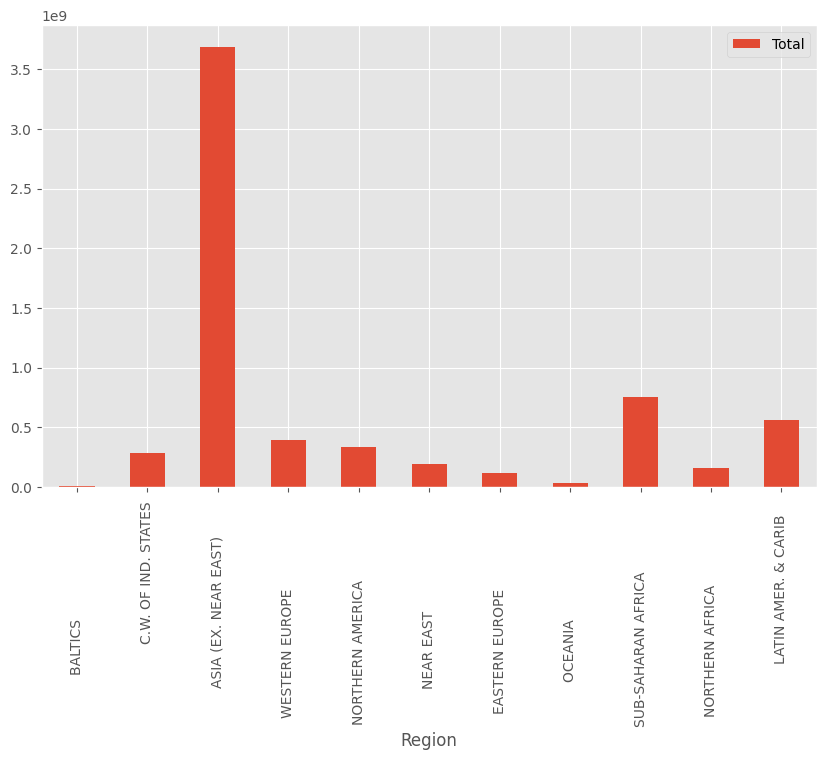

In [33]:
pd_countries.plot(x='Region', y='Total',kind='bar', figsize=(10, 6))

## User defined functions for data manipulation
Our `countries` DataFrame has some problems:
 * missing values
 * some numbers use comma instead of point as floating point separator (e.g. Literacy  = 99,4)
 
We can clean the data using User Defined Functions (UDF)

In [34]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf

Define a Python function which coverts numbers with commas to `float`

In [35]:
def to_float (s) :
   return float(s.replace(',','.'))

Test that it works:

In [36]:
to_float('0,99')

0.99

Now define a Spark UDF:

In [37]:
float_udf = udf(to_float , FloatType())

Test it on a Data Frame

In [38]:
countries.withColumn("Literacy", float_udf("Literacy (%)"))

DataFrame[Country: string, Region: string, Population: int, Area (sq. mi.): int, Pop. Density (per sq. mi.): string, Coastline (coast/area ratio): string, Net migration: string, Infant mortality (per 1000 births): string, GDP ($ per capita): int, Literacy (%): string, Phones (per 1000): string, Arable (%): string, Crops (%): string, Other (%): string, Climate: string, Birthrate: string, Deathrate: string, Agriculture: string, Industry: string, Service: string, Literacy: float]

OK, we can see that the `Literacy` is now `float`

In [39]:
countries.show(50)

+--------------------+--------------------+----------+--------------+--------------------------+----------------------------+-------------+----------------------------------+------------------+------------+-----------------+----------+---------+---------+-------+---------+---------+-----------+--------+-------+
|             Country|              Region|Population|Area (sq. mi.)|Pop. Density (per sq. mi.)|Coastline (coast/area ratio)|Net migration|Infant mortality (per 1000 births)|GDP ($ per capita)|Literacy (%)|Phones (per 1000)|Arable (%)|Crops (%)|Other (%)|Climate|Birthrate|Deathrate|Agriculture|Industry|Service|
+--------------------+--------------------+----------+--------------+--------------------------+----------------------------+-------------+----------------------------------+------------------+------------+-----------------+----------+---------+---------+-------+---------+---------+-----------+--------+-------+
|        Afghanistan |ASIA (EX. NEAR EA...|  31056997|       

In [40]:
countries.where((col("Literacy") < 50) & (col("GDP ($ per capita)") > 700)).show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `Literacy` cannot be resolved. Did you mean one of the following? [`Literacy (%)`, `Birthrate`, `Service`, `Climate`, `Country`].;
'Filter (('Literacy < 50) AND (GDP ($ per capita)#307 > 700))
+- Relation [Country#299,Region#300,Population#301,Area (sq. mi.)#302,Pop. Density (per sq. mi.)#303,Coastline (coast/area ratio)#304,Net migration#305,Infant mortality (per 1000 births)#306,GDP ($ per capita)#307,Literacy (%)#308,Phones (per 1000)#309,Arable (%)#310,Crops (%)#311,Other (%)#312,Climate#313,Birthrate#314,Deathrate#315,Agriculture#316,Industry#317,Service#318] csv


Oops, what does it mean???

- some rows have empty values!

Before we can use the table, we need to remove empty rows. Otherwise our UDF will fail.

In [41]:
full_countries = countries.select('Country', 'Population', 'Literacy (%)', 'GDP ($ per capita)').na.drop()

We can now apply the new UDF to the Data Frame:

In [42]:
full_countries = full_countries.withColumn("Literacy", float_udf("Literacy (%)"))

In [43]:
full_countries.show(50)

+--------------------+----------+------------+------------------+--------+
|             Country|Population|Literacy (%)|GDP ($ per capita)|Literacy|
+--------------------+----------+------------+------------------+--------+
|        Afghanistan |  31056997|        36,0|               700|    36.0|
|            Albania |   3581655|        86,5|              4500|    86.5|
|            Algeria |  32930091|        70,0|              6000|    70.0|
|     American Samoa |     57794|        97,0|              8000|    97.0|
|            Andorra |     71201|       100,0|             19000|   100.0|
|             Angola |  12127071|        42,0|              1900|    42.0|
|           Anguilla |     13477|        95,0|              8600|    95.0|
|  Antigua & Barbuda |     69108|        89,0|             11000|    89.0|
|          Argentina |  39921833|        97,1|             11200|    97.1|
|            Armenia |   2976372|        98,6|              3500|    98.6|
|              Aruba |   

In [44]:
full_countries.where((col("Literacy") < 50) & (col("GDP ($ per capita)") > 700)).show()

+--------------+----------+------------+------------------+--------+
|       Country|Population|Literacy (%)|GDP ($ per capita)|Literacy|
+--------------+----------+------------+------------------+--------+
|       Angola |  12127071|        42,0|              1900|    42.0|
|   Bangladesh | 147365352|        43,1|              1900|    43.1|
|        Benin |   7862944|        40,9|              1100|    40.9|
|       Bhutan |   2279723|        42,2|              1300|    42.2|
| Burkina Faso |  13902972|        26,6|              1100|    26.6|
|         Chad |   9944201|        47,5|              1200|    47.5|
|  Gambia, The |   1641564|        40,1|              1700|    40.1|
|       Guinea |   9690222|        35,9|              2100|    35.9|
|Guinea-Bissau |   1442029|        42,4|               800|    42.4|
|         Iraq |  26783383|        40,4|              1500|    40.4|
|         Mali |  11716829|        46,4|               900|    46.4|
|   Mauritania |   3177388|       

<Axes: xlabel='Literacy', ylabel='GDP ($ per capita)'>

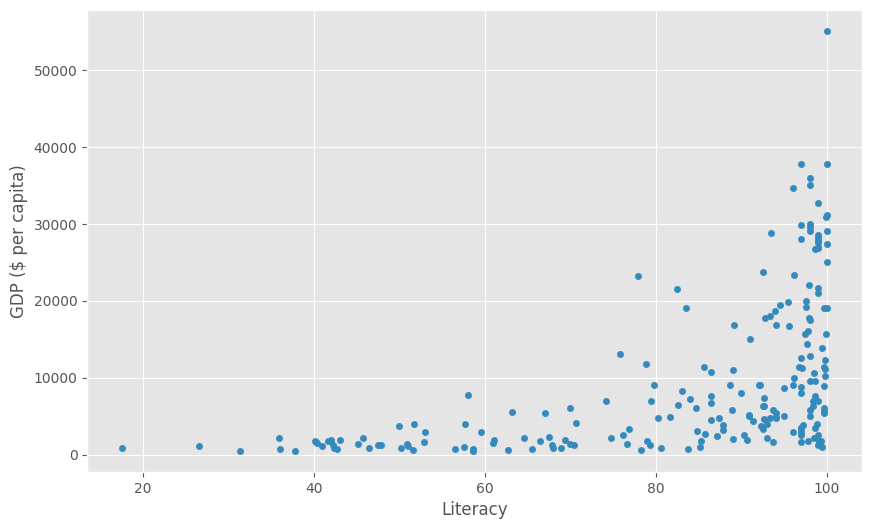

In [45]:
full_countries.toPandas().plot(x="Literacy",y="GDP ($ per capita)",kind="scatter",figsize=(10, 6))

# Useful information

 * https://spark.apache.org/docs/latest/quick-start.html
 * https://spark.apache.org/docs/latest/sql-programming-guide.html
 * https://pandas.pydata.org/pandas-docs/stable/visualization.html